# Midterm - Spring 2023

## Problem 1: Take-at-home  (45 points total)

You are applying for a position at the data science team of USDA and you are given data associated with determining appropriate parasite treatment of canines. The suggested treatment options are determined based on a **logistic regression** model that predicts if the canine is infected with a parasite. 

The data is given in the site: https://data.world/ehales/grls-parasite-study/workspace/file?filename=CBC_data.csv  and more specifically in the CBC_data.csv file. Login using you University Google account to access the data and the description that includes a paper on the study (**you dont need to read the paper to solve this problem**). Your target variable $y$ column is titled `parasite_status`. 




- https://pantelis.github.io/artificial-intelligence/intro.html

### Question 1 - Feature Engineering (5 points)

Write the posterior probability expressions for logistic regression for the problem you are given to solve.

$$p(y=1| \mathbf{x}, \mathbf w)$$ 

$$p(y=0| \mathbf{x}, \mathbf w)$$ 

$$p(y = 1|x, w) = \sigma (\mathbf{x^T}\mathbf{w}) = {1 \over 1 + e^{-x^Tw}}$$

$$p(y = 0|x, w) = 1 - \sigma (\mathbf{x^T}\mathbf{w}) = 1 -{1 \over 1 + e^{-x^Tw}}$$




### Question 2 - Decision Boundary (5 points)

Write the expression for the decision boundary assuming that $p(y=1)=p(y=0)$. The decision boundary is the line that separates the two classes.

$$p(y=1) + p(y=0) = 1$$

Linear decision function:

$$f(x) = w * x + \alpha$$

Decision Boundary:

$$H = \{x : w * x = - \alpha\}$$

$$y = 0.5$$



### Question 3 - Loss function (5 points)

Write the expression of the loss as a function of $\mathbf w$ that makes sense for you to use in this problem. 

NOTE: The loss will be a function that will include this function: 

$$\sigma(a) = \frac{1}{1+e^{-a}}$$



$$a = w^Tx$$

$$L_{CE} = - [\sum_{i=1}^n \{y_i \ln(\sigma(a)) + (1 - \sigma(a)) \ln(1 - \sigma (a))\}]$$


### Question 4 - Gradient (5 points)

Write the expression of the gradient of the loss with respect to the parameters - show all your work.



$${d \over da} \sigma (a) = {d \over da} (\frac{1}{1+e^{-a}})$$

$$= {e^{-a} \over (1 - e^{-a})^2}$$

$$= {1 \over 1 + e^{-a}} * {e^{-a} \over 1 + e^{-a}}$$

$$= {1 \over 1 + e^{-a}} * {1 + e^{-a} - 1 \over 1 + e^{-a}}$$

$$= {1 \over 1 + e^{-a}} * {1 + e^{-a} \over 1 + e^{-a}} - {1 \over 1 + e^{-a}}$$

$$= \sigma(a)(1 - \sigma(a))$$



$$ \nabla_\mathbf w L_{CE} =  \sum_{i=1}^m (\hat y_i - y_i)x_i$$


### Question 5 - Imbalanced dataset (10 points)

You are now told that in the dataset  

$$p(y=0) >> p(y=1)$$

Can you comment if the accuracy of Logistic Regression will be affected by such imbalance?



In [537]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)
sns.set_theme(style='whitegrid', palette='pastel')

import warnings
warnings.filterwarnings('ignore')

# Need to manually import to execute

df = pd.read_csv('CBC_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3018 entries, 0 to 3017
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               3018 non-null   object 
 1   SEX              3018 non-null   object 
 2   TYPEAREA         3018 non-null   object 
 3   SEX.REPRO        3018 non-null   object 
 4   REPRO.STATUS     3018 non-null   object 
 5   AGE              3018 non-null   int64  
 6   PARASITE_STATUS  3018 non-null   object 
 7   RBC              2995 non-null   float64
 8   HGB              2995 non-null   float64
 9   WBC              2996 non-null   float64
 10  EOS.CNT          2995 non-null   float64
 11  MONO.CNT         2995 non-null   float64
 12  NUT.CNT          2995 non-null   float64
 13  PL.CNT           2995 non-null   float64
 14  LYMP.CNT         2995 non-null   float64
dtypes: float64(8), int64(1), object(6)
memory usage: 353.8+ KB


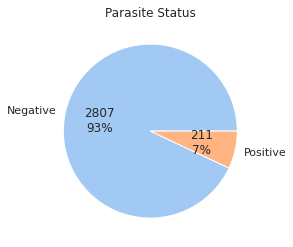

In [538]:
def label_function(val):
  return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

df.groupby('PARASITE_STATUS').size().plot(kind='pie', autopct=label_function)

plt.ylabel('') 
plt.title('Parasite Status')
plt.show()

The given problem is a binary classification problem with a dataset that is majority negative. Based on the graph above, 93% of data represent a 0 and 7% represent a 1.

For a logistic regression model, the dataset may produce more false negatives rather than false positives. The weights calculated by the model will focus on negative results rather than positive.

On a basic level if the model labeled all the data negative, it would have around a 93% accuracy based on the dataset. This would create a misleading result.



### Question 6 - SGD (15 points)

The interviewer was impressed with your answers and wants to test your programming skills. 

1. Use the dataset to train a logistic regressor that will predict the target variable $y$. 

 2. Report the harmonic mean of precision (p) and recall (r) i.e the  [metric called $F_1$ score](https://en.wikipedia.org/wiki/F-score) that is calculated as shown below using a test dataset that is 20% of each group. Plot the $F_1$ score vs the iteration number  $t$. 

$$F_1 = \frac{2}{r^{-1} + p^{-1}}$$

Your code includes hyperparameter optimization of the learning rate and mini batch size. Please learn about cross validation which is a splitting strategy for tuning models [here](https://scikit-learn.org/stable/modules/cross_validation.html).

You are allowed to use any library you want to code this problem.



In [539]:
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [540]:
df.head()

,ID,SEX,TYPEAREA,SEX.REPRO,REPRO.STATUS,AGE,PARASITE_STATUS,RBC,HGB,WBC,EOS.CNT,MONO.CNT,NUT.CNT,PL.CNT,LYMP.CNT
0,grls5ZUT2BYY,Male,Suburban,IntactMale,Intact,9,Negative,6.4,16.6,14.2,142.0,852.0,6390.0,210.0,6816.0
1,grls8DCONYUU,Female,Rural,NeuteredFemale,Neutered,6,Negative,4.8,12.5,10.0,400.0,300.0,4800.0,209.0,4500.0
2,grlsUC5R4PTT,Male,Suburban,IntactMale,Intact,14,Negative,6.2,17.3,9.5,190.0,475.0,7315.0,164.0,1520.0
3,grlsXUR2PY88,Male,Rural,IntactMale,Intact,6,Negative,5.4,13.8,14.1,1692.0,423.0,7755.0,254.0,4230.0
4,grlsTBZUF3GG,Female,Rural,IntactFemale,Intact,18,Negative,5.9,14.4,6.5,390.0,130.0,2795.0,213.0,3185.0


**Preprocessing**

In [541]:
# Remove rows with NaNs
df = df.dropna()

# All the columns replaced below have a sort of either binary or natural pattern
# to them so manually replaced them inplace.
#
# Ex: Rural -> Suburban -> Urban has increasing population density, so mapped
# to [0, 1, 2]

df['SEX'].replace(['Male', 'Female'], [1, 0], inplace=True)
df['REPRO.STATUS'].replace(['Intact', 'Neutered'], [1, 0], inplace=True)
df['PARASITE_STATUS'].replace(['Negative', 'Positive'], [0, 1], inplace=True)
df['TYPEAREA'].replace(['Rural', 'Suburban', 'Urban'], [0, 1, 2], inplace=True)


# Undersampling
# https://www.datasnips.com/63/undersampling-imbalanced-data-for-binary-classification/
positive = df[df['PARASITE_STATUS'] == 1]
negative = df[df['PARASITE_STATUS'] == 0]
negative = negative.sample(n=len(positive), random_state=42)
df = pd.concat([positive, negative], axis=0)


# Removing `ID` since doesn't provide model relevant information
# Removing `SEX.REPRO` because of already existing `SEX` and `REPRO.STATUS` columns
try:
  df = df.drop(['ID', 'SEX.REPRO'], axis=1)
except:
  pass


# Shifting target variable to the front for readability
cols = ['PARASITE_STATUS'] + [col for col in df if col != 'PARASITE_STATUS']
df = df[cols]

df.head()

,PARASITE_STATUS,SEX,TYPEAREA,REPRO.STATUS,AGE,RBC,HGB,WBC,EOS.CNT,MONO.CNT,NUT.CNT,PL.CNT,LYMP.CNT
7,1,1,1,1,9,5.8,14.7,13.9,139.0,417.0,7089.0,334.0,6255.0
19,1,1,0,1,25,5.8,14.6,11.3,0.0,1017.0,6667.0,183.0,3616.0
23,1,1,1,1,24,5.7,14.4,10.1,3131.0,404.0,3333.0,262.0,3232.0
24,1,0,1,1,11,5.0,13.6,10.7,1177.0,535.0,4922.0,318.0,4066.0
52,1,1,1,1,7,5.6,14.4,11.8,118.0,354.0,5664.0,319.0,5664.0


**Modeling**

In [542]:
X = df.drop(['PARASITE_STATUS'], axis=1)
y = df['PARASITE_STATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

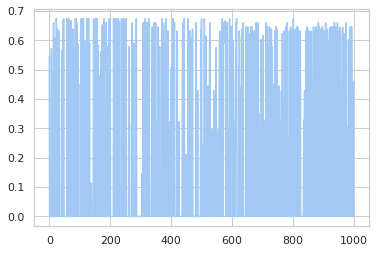

In [543]:
iters = 1000

clf = SGDClassifier(max_iter=iters, shuffle=True, random_state=42)

f1_scores = []

for _ in range(iters):
  clf.partial_fit(X_train, y_train, classes=[1, 0])
  y_pred = clf.predict(X_test)
  f1_scores.append(f1_score(y_test, y_pred))


sns.lineplot(x=range(len(f1_scores)), y=f1_scores)
plt.show()

**Tuning**

In [544]:
param_grid = {
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    # 'batch_size?': [16, 32, 64, 128]
}

sgd = SGDClassifier()

grid_search = GridSearchCV(sgd, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)

print(grid_search.best_score_)

0.3760951785106917
